In [1]:
import sys
sys.path.append('../')

import pandas as pd
import os
import plotly.express as px

In [2]:
from aztec_gddt.experiment import standard_run

sim_df = standard_run().set_index('time_l1')

/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.4.28
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 360, 17, 1, 8)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (360, 17, 1, 8)


Initializing configurations: 100%|██████████| 1/1 [00:00<00:00, 89.65it/s]


Execution Method: single_proc_exec
Execution Mode: single_threaded


Flattening results:   0%|          | 1/1441 [00:00<00:04, 319.27it/s]

Total execution time: 0.49s


In [3]:
sim_df.head(10)

,delta_l1_blocks,agents,current_process,transactions,gas_fee_l1,gas_fee_blob,finalized_blocks_count,simulation,subset,run,...,phase_duration_finalize,phase_duration_race,stake_activation_period,unstake_cooldown_period,proposal_probability_per_user_per_block,block_content_reveal_probability,tx_proof_reveal_probability,rollup_proof_reveal_probability,commit_bond_reveal_probability,gas_estimators
time_l1,,,,,,,,,,,,,,,,,,,,,
0,0,{194f8ed9-7c37-4788-942b-4cb898544219: Agent(u...,None,{},30,30,0,0,0,1,...,3,25,40,40,0.1,0.5,0.15,0.1,0.4,L1GasEstimators(proposal=<function <lambda> at...
1,0,{194f8ed9-7c37-4788-942b-4cb898544219: Agent(u...,Process(uuid=UUID('0c2808bd-70f4-4746-8747-405...,{},30,30,0,0,0,1,...,3,25,40,40,0.1,0.5,0.15,0.1,0.4,L1GasEstimators(proposal=<function <lambda> at...
2,0,{194f8ed9-7c37-4788-942b-4cb898544219: Agent(u...,Process(uuid=UUID('0c2808bd-70f4-4746-8747-405...,{},30,30,0,0,0,1,...,3,25,40,40,0.1,0.5,0.15,0.1,0.4,L1GasEstimators(proposal=<function <lambda> at...
3,0,{194f8ed9-7c37-4788-942b-4cb898544219: Agent(u...,Process(uuid=UUID('0c2808bd-70f4-4746-8747-405...,{},30,30,0,0,0,1,...,3,25,40,40,0.1,0.5,0.15,0.1,0.4,L1GasEstimators(proposal=<function <lambda> at...
4,0,{194f8ed9-7c37-4788-942b-4cb898544219: Agent(u...,Process(uuid=UUID('0c2808bd-70f4-4746-8747-405...,{},30,30,0,0,0,1,...,3,25,40,40,0.1,0.5,0.15,0.1,0.4,L1GasEstimators(proposal=<function <lambda> at...
5,0,{194f8ed9-7c37-4788-942b-4cb898544219: Agent(u...,Process(uuid=UUID('0c2808bd-70f4-4746-8747-405...,{},30,30,0,0,0,1,...,3,25,40,40,0.1,0.5,0.15,0.1,0.4,L1GasEstimators(proposal=<function <lambda> at...
6,0,{194f8ed9-7c37-4788-942b-4cb898544219: Agent(u...,Process(uuid=UUID('0c2808bd-70f4-4746-8747-405...,{},30,30,0,0,0,1,...,3,25,40,40,0.1,0.5,0.15,0.1,0.4,L1GasEstimators(proposal=<function <lambda> at...
7,0,{194f8ed9-7c37-4788-942b-4cb898544219: Agent(u...,Process(uuid=UUID('0c2808bd-70f4-4746-8747-405...,{},30,30,0,0,0,1,...,3,25,40,40,0.1,0.5,0.15,0.1,0.4,L1GasEstimators(proposal=<function <lambda> at...
8,0,{194f8ed9-7c37-4788-942b-4cb898544219: Agent(u...,Process(uuid=UUID('6a53f775-c5df-4277-a04f-e8c...,{},30,30,0,0,0,1,...,3,25,40,40,0.1,0.5,0.15,0.1,0.4,L1GasEstimators(proposal=<function <lambda> at...


<Axes: xlabel='time_l1'>

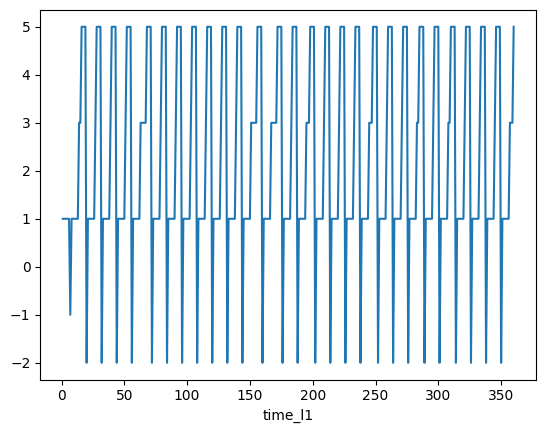

In [4]:
sim_df.current_process.map(lambda x: x.phase if x is not None else None).plot()

In [5]:
from aztec_gddt.types import SelectionPhase

sim_df.current_process.map(lambda x: repr(SelectionPhase(x.phase)) if x is not None else None).head(50)

time_l1
0                                               None
1              <SelectionPhase.pending_proposals: 1>
2              <SelectionPhase.pending_proposals: 1>
3              <SelectionPhase.pending_proposals: 1>
4              <SelectionPhase.pending_proposals: 1>
5              <SelectionPhase.pending_proposals: 1>
6              <SelectionPhase.pending_proposals: 1>
7                       <SelectionPhase.skipped: -1>
8              <SelectionPhase.pending_proposals: 1>
9              <SelectionPhase.pending_proposals: 1>
10             <SelectionPhase.pending_proposals: 1>
11             <SelectionPhase.pending_proposals: 1>
12             <SelectionPhase.pending_proposals: 1>
13             <SelectionPhase.pending_proposals: 1>
14                <SelectionPhase.pending_reveal: 3>
15                <SelectionPhase.pending_reveal: 3>
16          <SelectionPhase.pending_finalization: 5>
17          <SelectionPhase.pending_finalization: 5>
18          <SelectionPhase.pending_fi

In [6]:
sim_df.current_process.map(lambda p: p.duration_in_current_phase if p is not None else None)

time_l1
0      NaN
1      0.0
2      1.0
3      2.0
4      3.0
      ... 
356    5.0
357    0.0
358    1.0
359    2.0
360    0.0
Name: current_process, Length: 361, dtype: float64